In [1]:
import matplotlib.pyplot as plt
import cv2
import math
import seaborn as sns
import numpy as np

In [2]:
def plot_cv_img(input_image, output_image):
    """
    Converts an image from BGR to RGB and plots
    """
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
    ax[0].imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Input Image')
    ax[0].axis('off')
    ax[1].imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
    ax[1].set_title('Gaussian Blurred')
    ax[1].axis('off')
    plt.show()

In [3]:
def gaussian(x, nu, sigma):
    return 1 / math.sqrt(2 * math.pi * (sigma ** 2)) * math.e ** (- (x - nu) ** 2 / (2 * (sigma ** 2)))

In [11]:
def create_kernel(kernel_size, sigmaX, sigmaY=None):
    
    kernel_radius = kernel_size // 2
    sigmaX = sigmaX or kernel_radius / 2
    sigmaY = sigmaY or sigmaX
    mu = kernel_radius
    
    hkernel = [gaussian(x, mu, sigmaX) for x in range(kernel_size)]
    vkernel = [gaussian(y, mu, sigmaY) for y in range(kernel_size)]
    
    kernel = [[x * y for x in hkernel] for y in vkernel]
    
    kernel_sum = sum(sum(el) for el in kernel)
    kernel = [[el / kernel_sum for el in row] for row in kernel]
    
    return np.array(kernel)

In [5]:
def multiply(a, b):
#     res = 0
    
#     for i in range(len(a)):
#         for j in range(len(a[i])):
#             res += a[i][j] * b[i][j]
            
#     return round(res)

    res = np.multiply(a, b)
    
    return round(np.sum(res))

In [6]:
def add_padding(a, kernel_size):
    kernel_radius = kernel_size // 2
    a_copy = []
    
    for _ in range(kernel_radius):
        a_copy.append([0 for _ in range(len(a[0]) + kernel_size - 1)])
    
    for el in a:
        a_copy.append([0] * kernel_radius + list(el) + [0] * kernel_radius)
        
    for _ in range(kernel_radius):
        a_copy.append([0 for _ in range(len(a[0]) + kernel_size - 1)])
        
    return np.array(a_copy)

In [21]:
def gaussian_blur(img, kernel_size, sigmaX, sigmaY=None):
    
    kernel = create_kernel(kernel_size, sigmaX, sigmaY)
    
    output = np.zeros(img.shape, dtype='uint8')

    img_r = add_padding(img[:, :, 0], kernel_size)
    img_g = add_padding(img[:, :, 1], kernel_size)
    img_b = add_padding(img[:, :, 2], kernel_size)

    for i in range(output.shape[0]):
        for j in range(output.shape[1]):
            r = multiply(img_r[i : i + kernel_size, j : j + kernel_size], kernel)
            g = multiply(img_g[i : i + kernel_size, j : j + kernel_size], kernel)
            b = multiply(img_b[i : i + kernel_size, j : j + kernel_size], kernel)

            output[i][j] = [r, g, b]
            
    return output

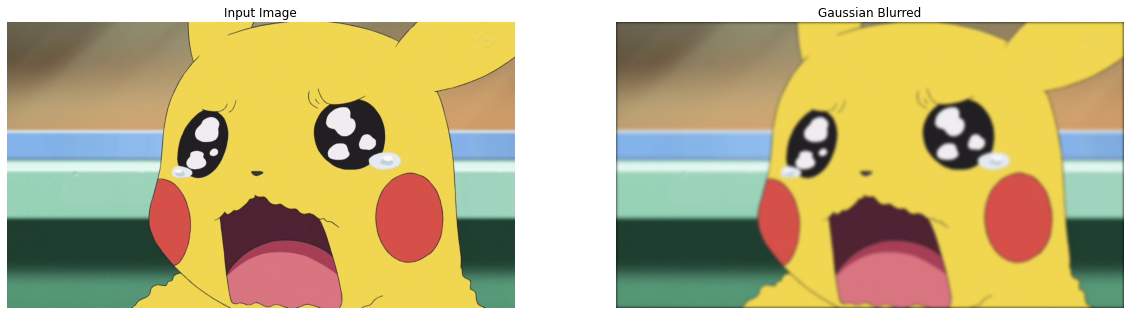

In [12]:
img = cv2.imread('pikachu.jpg')

kernel_size = 25
sigmaX = 0

gblur1 = gaussian_blur(img, kernel_size, sigmaX)

plot_cv_img(img, gblur1)

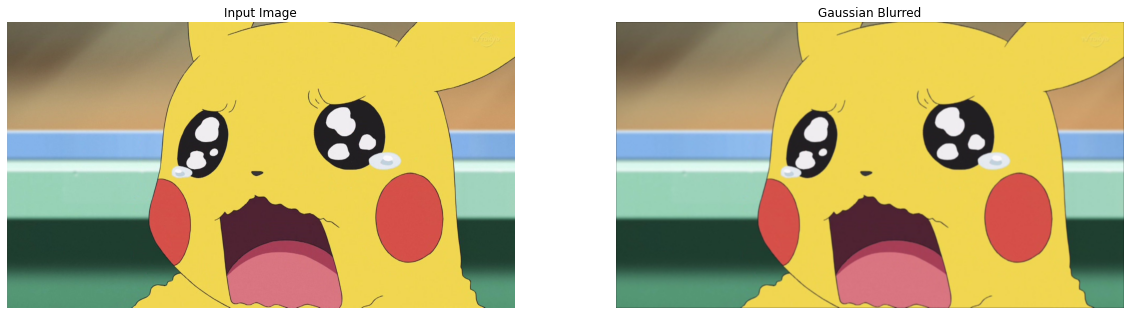

In [14]:
kernel_size = 7
sigmaX = 0

gblur2 = gaussian_blur(img, kernel_size, sigmaX)

plot_cv_img(img, gblur2)

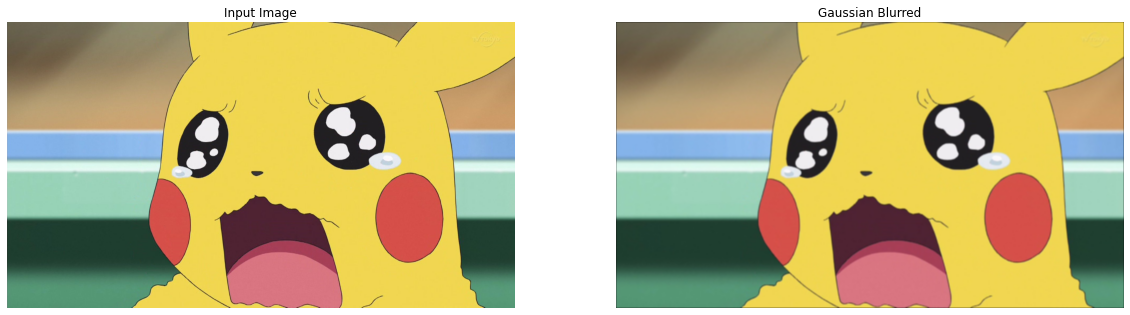

In [15]:
kernel_size = 7
sigmaX = 100

gblur3 = gaussian_blur(img, kernel_size, sigmaX)

plot_cv_img(img, gblur3)

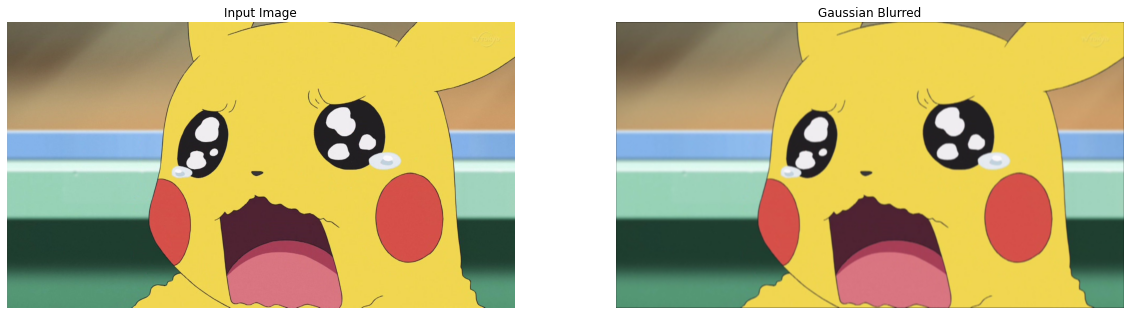

In [16]:
kernel_size = 7
sigmaX = 1.5
sigmaY = 20

gblur4 = gaussian_blur(img, kernel_size, sigmaX, sigmaY)

plot_cv_img(img, gblur4)

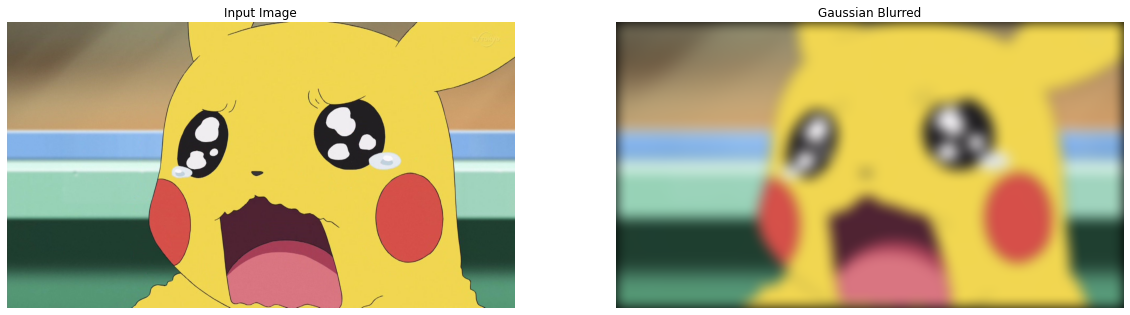

In [22]:
kernel_size = 101
sigmaX = 0

gblur5 = gaussian_blur(img, kernel_size, sigmaX)

plot_cv_img(img, gblur5)